In [14]:
import pandas as pd

data = pd.read_csv('raw.csv').sample(n=10000, ignore_index=True)
data = data.dropna()
data

,Unnamed: 0,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,...,count?,count-,count=,url_length,hostname_length,fd_length,tld_length,count_digits,count_letters,type_code
0,459949,topbusinessentrepreneurs.com/stephen-jarislows...,benign,0,0,1,2,0,0,1,...,0,1,0,53,0,24,-1,0,49,0
1,226775,oeorybl.suppa.jp/1960.html,benign,0,0,1,3,0,0,1,...,0,0,0,26,0,9,-1,4,18,0
2,136528,dailymotion.com/video/x3y0zx_arashi-one-tour-a...,benign,0,0,1,1,0,0,2,...,0,6,0,70,0,5,-1,3,56,0
3,436218,linkedin.com/pub/tiffany-chin/7/7b8/568,benign,0,0,1,1,0,0,5,...,0,1,0,39,0,3,-1,6,26,0
4,347115,denisboucherconstruction.com/,benign,0,0,1,1,0,0,1,...,0,0,0,29,0,0,-1,0,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,450362,http://interpark.com/displaycorner/FreeMarket....,benign,0,1,1,2,0,0,2,...,1,0,5,129,13,13,3,27,83,0
9996,218834,http://moviepilot.com/posts/2015/05/13/wait-th...,benign,0,1,1,1,0,0,5,...,0,10,0,93,14,5,3,15,59,0
9997,236237,people.famouswhy.com/amy_fisher/,benign,0,0,1,2,0,0,2,...,0,0,0,32,0,10,-1,0,27,0
9998,427929,local.yahoo.com/info-17936173-parkway-real-est...,benign,0,0,1,2,0,0,1,...,0,6,0,65,0,49,-1,8,48,0


In [15]:
data['type_binary'] = data['type'].apply(lambda x: 0 if x == 'benign' else 1)

data_cleaned = data.drop(['Unnamed: 0', 'type'], axis=1)
data_cleaned

,url,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domain,sus_url,...,count-,count=,url_length,hostname_length,fd_length,tld_length,count_digits,count_letters,type_code,type_binary
0,topbusinessentrepreneurs.com/stephen-jarislows...,0,0,1,2,0,0,1,0,0,...,1,0,53,0,24,-1,0,49,0,0
1,oeorybl.suppa.jp/1960.html,0,0,1,3,0,0,1,0,0,...,0,0,26,0,9,-1,4,18,0,0
2,dailymotion.com/video/x3y0zx_arashi-one-tour-a...,0,0,1,1,0,0,2,0,0,...,6,0,70,0,5,-1,3,56,0,0
3,linkedin.com/pub/tiffany-chin/7/7b8/568,0,0,1,1,0,0,5,0,0,...,1,0,39,0,3,-1,6,26,0,0
4,denisboucherconstruction.com/,0,0,1,1,0,0,1,0,0,...,0,0,29,0,0,-1,0,27,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,http://interpark.com/displaycorner/FreeMarket....,0,1,1,2,0,0,2,0,1,...,0,5,129,13,13,3,27,83,0,0
9996,http://moviepilot.com/posts/2015/05/13/wait-th...,0,1,1,1,0,0,5,0,0,...,10,0,93,14,5,3,15,59,0,0
9997,people.famouswhy.com/amy_fisher/,0,0,1,2,0,0,2,0,0,...,0,0,32,0,10,-1,0,27,0,0
9998,local.yahoo.com/info-17936173-parkway-real-est...,0,0,1,2,0,0,1,0,0,...,6,0,65,0,49,-1,8,48,0,0


In [16]:
data_cleaned['type_binary'].value_counts()

type_binary
0    6651
1    3349
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler

features = data_cleaned.drop(['url', 'type_binary'], axis=1)
labels = data_cleaned['type_binary']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

features_scaled.shape

(10000, 23)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_model(input_shape):
    model = Sequential([
        Dense(input_shape, activation=None, input_shape=(input_shape,), kernel_regularizer=None),
        Dropout(0.5),
        Dense(input_shape, activation='relu', kernel_regularizer=None),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [19]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(class_weight=None, classes=np.unique(labels), y=labels)
class_weights_dict = dict(enumerate(class_weights))

In [20]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

In [21]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='accuracy', mode='min', patience=3)

In [22]:
from sklearn.metrics import confusion_matrix

fold = 1
accuracy = []
loss = []
full_history = []
conf_matrices = []

for train, test in kfold.split(features_scaled, labels):
    model = create_model(features_scaled.shape[1])
    print(f'Fold {fold}:')
    history = model.fit(features_scaled[train], labels[train], batch_size=64, epochs=10, callbacks=[early_stopping],
                         class_weight=class_weights_dict, verbose=1, validation_data=(features_scaled[test], labels[test]))

    predictions = model.predict(features_scaled[test])
    predicted_labels = np.where(predictions > 0.5, 1, 0)
    cm = confusion_matrix(labels[test], predicted_labels)
    conf_matrices.append(cm)
    
    scores = model.evaluate(features_scaled[test], labels[test])
    print(f'Score: {model.metrics_names[0]} {scores[0]}; {model.metrics_names[1]} {scores[1]}')
    print()
    loss.append(scores[0])
    accuracy.append(scores[1])
    full_history.append(history)
    
    fold += 1

Fold 1:
Epoch 1/10
125/125 [==============================] - 1s 3ms/step - loss: 0.4225 - accuracy: 0.8227 - val_loss: 0.1237 - val_accuracy: 0.9785
Epoch 2/10
125/125 [==============================] - 0s 2ms/step - loss: 0.1938 - accuracy: 0.9415 - val_loss: 0.0493 - val_accuracy: 0.9885
Epoch 3/10
125/125 [==============================] - 0s 2ms/step - loss: 0.1162 - accuracy: 0.9670 - val_loss: 0.0272 - val_accuracy: 0.9935
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 0.9960
Score: loss 0.01974928192794323; accuracy 0.9959999918937683

Fold 2:
Epoch 1/10
125/125 [==============================] - 1s 3ms/step - loss: 0.5849 - accuracy: 0.7514 - val_loss: 0.2240 - val_accuracy: 0.9580
Epoch 2/10
125/125 [==============================] - 0s 2ms/step - loss: 0.2306 - accuracy: 0.9250 - val_loss: 0.0884 - val_accuracy: 0.9765
Epoch 3/10
125/125 [==============================] - 0s 2ms/step - loss: 0.1230 - accuracy: 0.9631 - val_loss: 0.

In [23]:
print('Average score:')
print(f'Accuracy: {np.mean(accuracy)} (max = {np.max(accuracy)}, min = {np.min(accuracy)})')
print(f'Loss: {np.mean(loss)} (max = {np.max(loss)}, min = {np.min(loss)})')

Average score:
Accuracy: 0.9911999940872193 (max = 0.9959999918937683, min = 0.9850000143051147)
Loss: 0.026418504118919373 (max = 0.040367502719163895, min = 0.01969602145254612)


In [24]:
from sklearn.metrics import classification_report

print('Classification report:')
print(classification_report(labels[test], predicted_labels))

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1326
           1       0.98      1.00      0.99       674

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



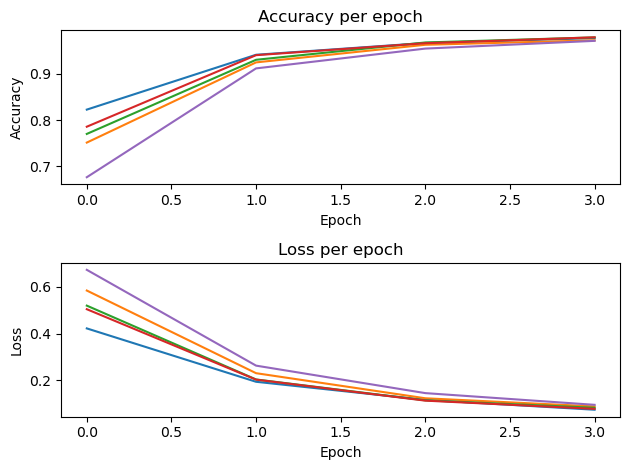

In [25]:
import matplotlib.pyplot as plt

for i, history in enumerate(full_history):
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'])
    plt.title('Accuracy per epoch')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')

    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'])
    plt.title('Loss per epoch')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')

plt.tight_layout()
plt.show()

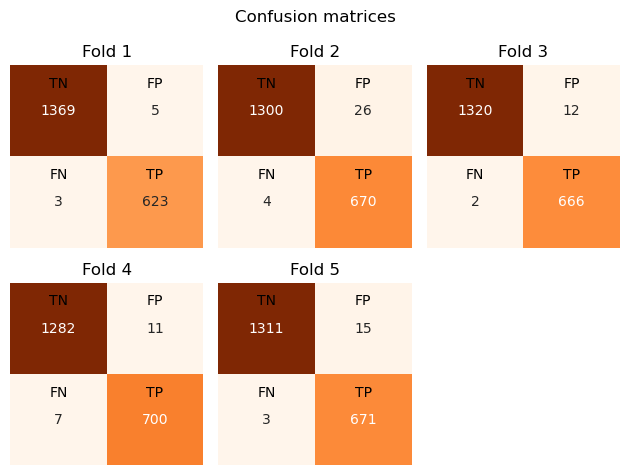

In [26]:
import seaborn as sns

for i, cm in enumerate(conf_matrices):
    plt.subplot(2, 3, i+1)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Oranges', cbar=False)
    plt.title(f'Fold {i+1}')
    plt.xticks([])
    plt.yticks([])
    labels = ['TN', 'FP', 'FN', 'TP']
    labels = np.asarray(labels).reshape(2,2)
    for y in range(cm.shape[0]):
        for x in range(cm.shape[1]):
            plt.text(x+0.5, y+0.2, labels[y, x], horizontalalignment='center', verticalalignment='center')

plt.suptitle('Confusion matrices')
plt.tight_layout()
plt.show()